## Count leaves in an image using HSV segmentation and contour analysis.

### No Controls

01_Morning.jpg: 2 leaves detected
02_Morning.jpg: 3 leaves detected
03_Morning.jpg: 3 leaves detected
04_Morning.jpg: 4 leaves detected
05_Morning.jpg: 4 leaves detected
06_Morning.jpg: 4 leaves detected
07_Morning.jpg: 4 leaves detected
08_Morning.jpg: 5 leaves detected
09_Morning.jpg: 5 leaves detected
10_Morning.jpg: 5 leaves detected
11_Morning.jpg: 5 leaves detected
12_Morning.jpg: 5 leaves detected


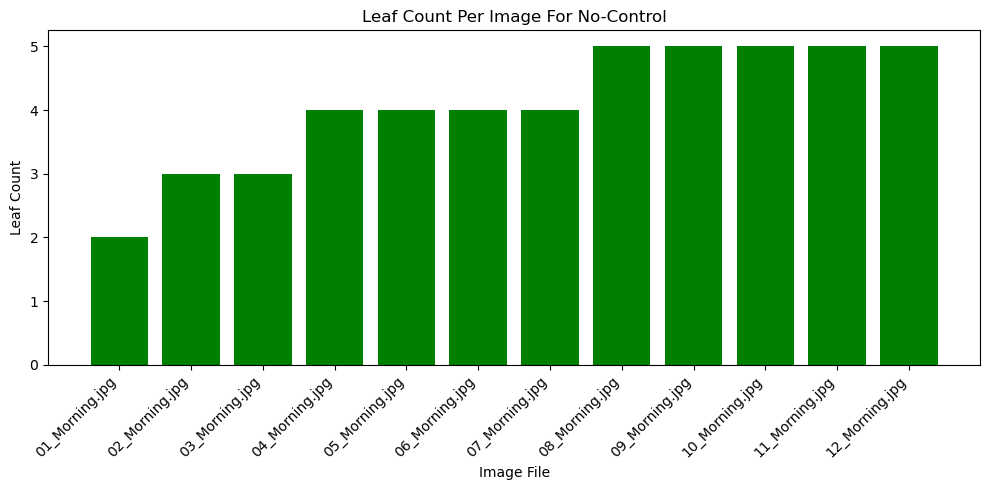

Counting process is completed


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

folder_path = "PlantSelected/NoControls"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]

def count_leaves(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Can't read image: {image_path}")
        return 0
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # Converting to HSV color for do color segmentation
    
    lower_green = np.array([36, 60, 70]) # Define range for green color in HSV (light green color)
    upper_green = np.array([80, 255, 255]) #(Dark green)
    
    mask = cv2.inRange(hsv, lower_green, upper_green) # Creating mask for green color
    
    # Morphological operations for noise removal
    small_kernel = np.ones((3, 3), np.uint8)
    large_kernel = np.ones((7, 7), np.uint8)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=2) # Removing small noise with opening
    
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3) # Filling holes with closing
    
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #finding outline of the white regions
    
    # Filter contours by area - increase this value significantly
    min_contour_area = 1490 
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

    # Draw contours on a copy of the original image
    result_img = image.copy()
    cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
    
    # Add text showing the leaf count
    cv2.putText(result_img, f'Leaf count: {len(filtered_contours)}', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Save the result image
    result_filename = "NoCOntrols_result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return len(filtered_contours)

# Processing each image and count leaves
leaf_counts = {}
for image_file in image_files:
    full_path = os.path.join(folder_path, image_file)
    leaf_counts[image_file] = count_leaves(full_path)
    print(f"{image_file}: {leaf_counts[image_file]} leaves detected")

plt.figure(figsize=(10, 5))
plt.bar(leaf_counts.keys(), leaf_counts.values(), color='green')
plt.xlabel("Image File")
plt.ylabel("Leaf Count")
plt.title("Leaf Count Per Image For No-Control")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('leaf_count_graph.png')
plt.show()

print("Counting process is completed")


01_Morning.jpg: 2 leaves detected
02_Morning.jpg: 2 leaves detected
03_Morning.jpg: 2 leaves detected
04_Morning.jpg: 2 leaves detected
05_Morning.jpg: 2 leaves detected
06_Morning.jpg: 4 leaves detected
07_Morning.jpg: 2 leaves detected
08_Morning.jpg: 2 leaves detected
09_Morning.jpg: 3 leaves detected
10_Morning.jpg: 1 leaves detected
11_Morning.jpg: 1 leaves detected
12_Morning.jpg: 1 leaves detected


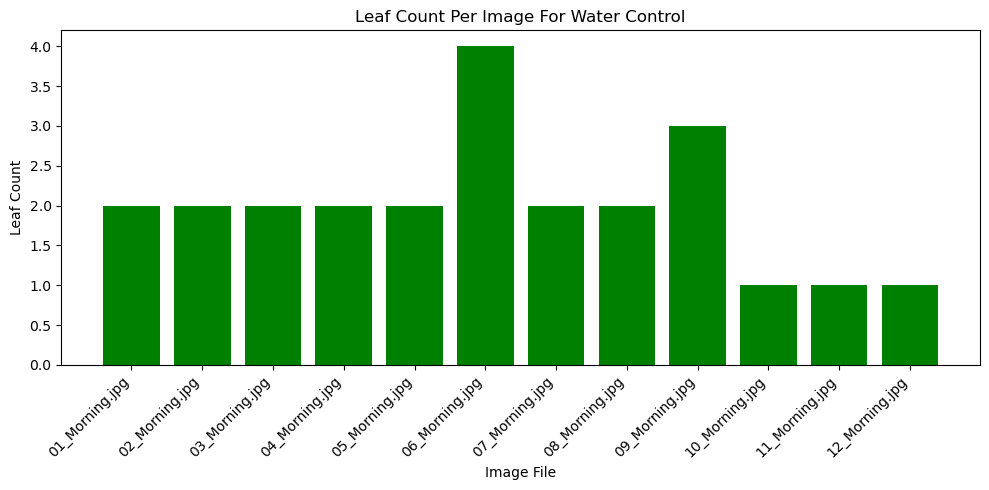

Counting process is completed


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

folder_path = "PlantSelected/WaterControls"
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]

def count_leaves(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Can't read image: {image_path}")
        return 0
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # Converting to HSV color
    
    lower_green = np.array([36, 60, 70]) # Define range for green color in HSV (light green color)
    upper_green = np.array([80, 255, 255]) #(Dark green)
    
    mask = cv2.inRange(hsv, lower_green, upper_green) # Creating mask for green color
    
    # Morphological operations for noise removal
    small_kernel = np.ones((3, 3), np.uint8)
    large_kernel = np.ones((9, 9), np.uint8)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=2) # Removing small noise with opening
    
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3) # Filling holes with closing
    
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by area - increase this value significantly
    min_contour_area = 1490 
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

    # Draw contours on a copy of the original image
    result_img = image.copy()
    cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
    
    # Add text showing the leaf count
    cv2.putText(result_img, f'Leaf count: {len(filtered_contours)}', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Save the result image
    result_filename = "WaterControls_result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return len(filtered_contours)

# Processing each image and count leaves
leaf_counts = {}
for image_file in image_files:
    full_path = os.path.join(folder_path, image_file)
    leaf_counts[image_file] = count_leaves(full_path)
    print(f"{image_file}: {leaf_counts[image_file]} leaves detected")

plt.figure(figsize=(10, 5))
plt.bar(leaf_counts.keys(), leaf_counts.values(), color='green')
plt.xlabel("Image File")
plt.ylabel("Leaf Count")
plt.title("Leaf Count Per Image For Water Control")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('leaf_count_graph_water_control.png')
plt.show()

print("Counting process is completed")
